# 데이터 불러오기
직접 csv 파일을 불러오는 형식 

In [1]:
from google.colab import files
myfile = files.upload()

Saving 국세청,2019년 종합소득세 표본자료(2020),국세통계센터_누리집,20221007.csv to 국세청,2019년 종합소득세 표본자료(2020),국세통계센터_누리집,20221007 (1).csv


In [2]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(myfile['국세청,2019년 종합소득세 표본자료(2020),국세통계센터_누리집,20221007.csv']), encoding='cp949')

# 데이터 종류 및 행렬 확인 작업

In [ ]:
data.head()

,일련번호,가중치,소득분위층,성별,연령대,지역,업태,신고서소득세신고유형,기장의무구분,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
0,1,315,3층,여성,34세 이하,비수도권,도·소매업,단순경비율,간편장부,18480000,15840000,2640000,1500000,2580000,70000,0,90000,0
1,2,315,3층,남성,55세~64세,수도권,도·소매업,단순경비율,간편장부,42630000,39170000,3450000,3000000,3390000,60000,0,240000,0
2,3,315,3층,여성,55세~64세,비수도권,도·소매업,단순경비율,간편장부,14610000,11470000,3140000,2000000,3080000,60000,0,90000,0
3,4,315,3층,여성,45세~54세,비수도권,도·소매업,단순경비율,간편장부,32460000,29520000,2940000,2000000,2880000,60000,0,90000,0
4,5,314,3층,여성,55세~64세,비수도권,음식·숙박업,단순경비율,간편장부,29310000,26670000,2640000,2000000,2560000,80000,0,90000,0



*   기장의무 : 과세요건과 과세대상에 대한 확인과 계산을 위하여 납세의무자의 사업활동에 관한 거래행위 등의 내용을 기재한 장부를 비치하도록 세법에서 규정한 것을 말한다.  

*   인적공제: 보통 부양가족 공제라고 불리는 항목으로 근로자 본인 및 배우자, 생계를 같이하는 부양가족에 대해 근로자의 생계 비용 등을 고려해 일정액을 공제하는 제도    

*   소득공제 : 소득세를 계산할 때 특정 지출에 대한 일정 금액을 '과세 대상이 되는 소득'으로 치지 않는 것을 말한다.   

*   과세표준 : 납세의무자에게 구체적인 납세의무를 부과할 때 세액계산의 기준이 되는 과세객체(과세대상)의 금액  






In [ ]:
data.dtypes

일련번호           int64
가중치            int64
소득분위층         object
성별            object
연령대           object
지역            object
업태            object
신고서소득세신고유형    object
기장의무구분        object
총수입합계금액        int64
필요경비합계금액       int64
종합소득금액         int64
인적공제금액         int64
소득공제합계액        int64
과세표준금액         int64
산출세액           int64
세액공제           int64
결정세액           int64
dtype: object

In [ ]:
data.shape

(149271, 18)

결측치 제거 후 샘플링 실시

In [3]:
extract_data = data.dropna(axis = 0 , how = 'any')

In [ ]:
extract_data.shape

(145127, 18)

약 4100개 정도가 결측값이 있는것으로 판단되어서 제거하고 샘플링 추출

직접 다 실습해보고 싶지만 그러기에는 환경이 되지 않으므로 결측치 제외한 데이터 14513개 샘플링(10%) 추출후 CTGAN 실습을 실행해 보도록 하겠습니다.

In [4]:
sample = extract_data.sample(frac=0.1,replace=False) # 중복추출 허용 X

In [ ]:
sample.head()

,일련번호,가중치,소득분위층,성별,연령대,지역,업태,신고서소득세신고유형,기장의무구분,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
56093,56094,34,17층,남성,34세 이하,수도권,기타,단순경비율,간편장부,52820000,17520000,35300000,1500000,4840000,30460000,3490000,410000,1780000
305,306,41,16층,여성,55세~64세,수도권,기타,비사업자,비사업자,34050000,0,34100000,1500000,1500000,32600000,4770000,0,4770000
12844,12845,310,4층,남성,55세~64세,수도권,운수·창고·통신업,단순경비율,간편장부,37860000,34390000,3470000,1500000,1500000,1970000,120000,90000,30000
18679,18680,164,9층,남성,45세~54세,수도권,도·소매업,기준경비율,간편장부,41860000,32560000,9300000,4000000,4180000,5120000,310000,290000,20000
49082,49083,41,16층,여성,45세~54세,비수도권,기타,비사업자,비사업자,44880000,11980000,32900000,1500000,5850000,27050000,2980000,780000,2200000


In [ ]:
sample.shape

(14513, 18)

## CTGAN package 설치

In [ ]:
!pip install ctgan
!pip install table_evaluator
!pip install sdv
from sdv import load_demo
from sdv.tabular import CTGAN
from pandas import Series, DataFrame

## 다른 시각화 패키지 설치 

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
import seaborn as sns
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family = 'NanumBarunGothic')

## CTGAN 실행

In [7]:
model = CTGAN(epochs=10) # epochs=200 / 원래는 batch_size 10 
model.fit(sample)
new_data = model.sample(14513)

# 데이터 형식 및 결측값 분석 

In [ ]:
new_data.head()

,일련번호,가중치,소득분위층,성별,연령대,지역,업태,신고서소득세신고유형,기장의무구분,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
0,66161,22,3층,여성,45세~54세,수도권,운수·창고·통신업,비사업자,간편장부,80000,171400025,217103880,5085052,9150699,39529386,5530165,1807605,4935022
1,20722,24,16층,남성,55세~64세,비수도권,제조업,외부조정,간편장부,4742890,980935165,180083592,6508333,10735367,111011792,427276276,1149394,63574321
2,46857,45,23층,여성,45세~54세,비수도권,도·소매업,외부조정,복식부기,34495694,0,175898899,1532785,8613424,54645373,101880053,979250,0
3,38064,24,16층,남성,55세~64세,수도권,음식·숙박업,자기조정,비사업자,86889873,8790107,156540758,4332689,3836048,54991141,0,0,0
4,67964,25,22층,남성,45세~54세,수도권,부동산업,외부조정,복식부기,163641819,619185473,30036756,7003586,19268290,6624864,12242265,259193,2849726


In [ ]:
new_data.dtypes

일련번호           int64
가중치            int64
소득분위층         object
성별            object
연령대           object
지역            object
업태            object
신고서소득세신고유형    object
기장의무구분        object
총수입합계금액        int64
필요경비합계금액       int64
종합소득금액         int64
인적공제금액         int64
소득공제합계액        int64
과세표준금액         int64
산출세액           int64
세액공제           int64
결정세액           int64
dtype: object

In [ ]:
print(sample.shape, new_data.shape)

(14513, 18) (14513, 18)


In [ ]:
sample.isnull().sum()

일련번호          0
가중치           0
소득분위층         0
성별            0
연령대           0
지역            0
업태            0
신고서소득세신고유형    0
기장의무구분        0
총수입합계금액       0
필요경비합계금액      0
종합소득금액        0
인적공제금액        0
소득공제합계액       0
과세표준금액        0
산출세액          0
세액공제          0
결정세액          0
dtype: int64

In [ ]:
new_data.isnull().sum()

일련번호          0
가중치           0
소득분위층         0
성별            0
연령대           0
지역            0
업태            0
신고서소득세신고유형    0
기장의무구분        0
총수입합계금액       0
필요경비합계금액      0
종합소득금액        0
인적공제금액        0
소득공제합계액       0
과세표준금액        0
산출세액          0
세액공제          0
결정세액          0
dtype: int64

확인 결과 결측값은 재현자료에서도 없는것으로 보여짐.

In [ ]:
sample.isna().any(axis=1)

56093     False
305       False
12844     False
18679     False
49082     False
          ...  
53744     False
60143     False
130455    False
111137    False
52687     False
Length: 14513, dtype: bool

In [ ]:
sample['성별'].value_counts()

남성    10185
여성     4328
Name: 성별, dtype: int64

In [ ]:
new_data['성별'].value_counts()

남성    9692
여성    4821
Name: 성별, dtype: int64

#연속형 자료 산점도

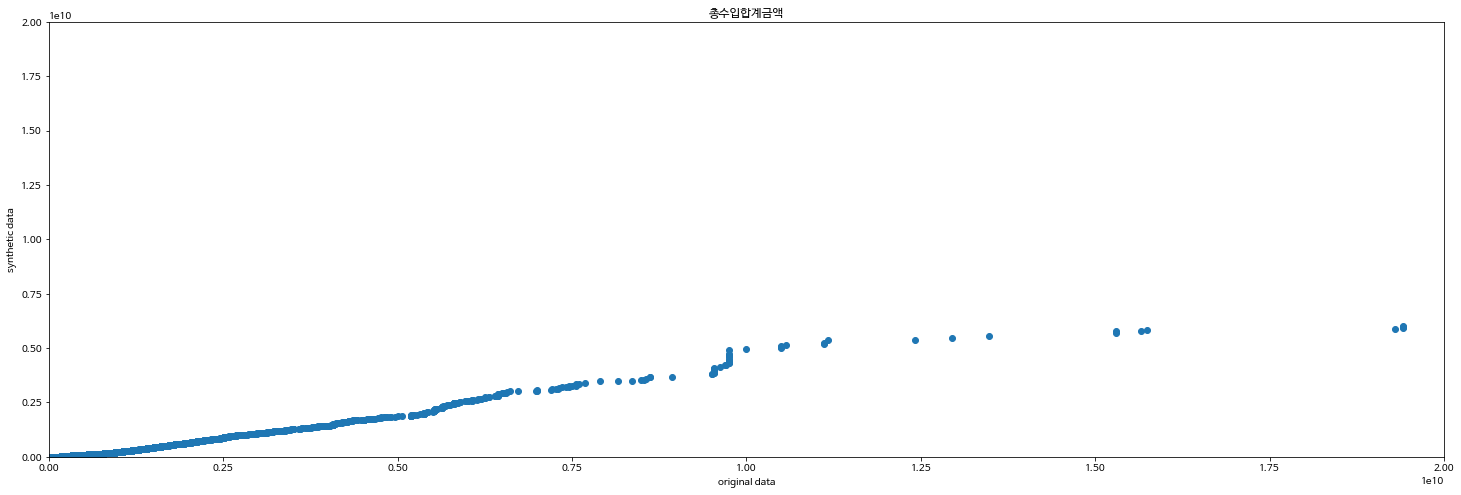

In [36]:
plt.scatter(sample.sort_values('총수입합계금액',ascending=True)['총수입합계금액'],new_data.sort_values('총수입합계금액',ascending=True)['총수입합계금액'])
plt.title("총수입합계금액")
plt.xlim(0,20000000000)
plt.ylim(0,20000000000)
plt.xlabel("original data")
plt.ylabel("synthetic data")
plt.show()

산점도 확인 했을때 어느 정도의 선형성이 보이고, 너무 같지 않은 모습을 보아 과대적합도 되지 않은것으로 판단된다.

연속형 산점도의 경우에는 함수를 짤 필요가 없다고 느끼는게 유효하다고 생각되는 연속형 변수의 명만 넣어서 출력값을 보면 된다고 판단된다.

# 범주별 막대그래프

## 성별 변수 막대그래프 

In [ ]:
sample_men = sample[sample['성별']=='남성'].value_counts()
sample_women = sample[sample['성별']=='여성'].value_counts()
new_data_men = new_data[new_data['성별']=='남성'].value_counts()
new_data_women = new_data[new_data['성별']=='여성'].value_counts()

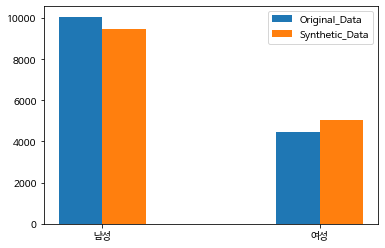

In [ ]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

gender = ["남성","여성"]
original = [len(sample_men),len(sample_women)]
synthetic_data = [len(new_data_men),len(new_data_women)]
x_axis = np.arange(len(gender))

# Multi bar Chart

plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data')
plt.bar(x_axis +0.20*2, synthetic_data, width=0.2, label = 'Synthetic_Data')

# Xticks

plt.xticks(x_axis+0.3,gender)

# Add legend

plt.legend()

# Display

plt.show()

결과값으로 보아 정말 유사하게 재현된 것을 확인 할 수 있으며 과대적합으로 판단된다.   
따라서 더 많은 표본의 갯수로 재현하면 과대적합을 줄일 수 있을것으로 판단된다.

## 성별 변수 파이그래프 

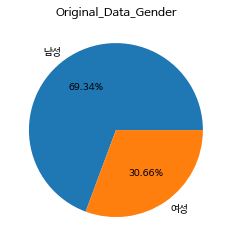

In [ ]:
old = pd.DataFrame(sample['성별'].value_counts()/sample['성별'].count())
old.reset_index(inplace=True)
plt.pie(x = list(old['성별']),
        labels = list(old['index']),
        autopct = '%.2f%%') # 소수 둘째짜리까지 표현 
plt.title('Original_Data_Gender')        
plt.show()

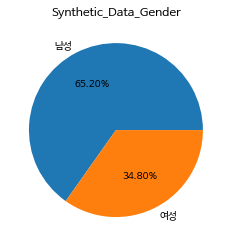

In [ ]:
new = pd.DataFrame(new_data['성별'].value_counts()/new_data['성별'].count())
new.reset_index(inplace=True)
plt.pie(x = list(new['성별']),
        labels = list(new['index']),
        autopct = '%.2f%%') # 소수 둘째짜리까지 표현  
plt.title('Synthetic_Data_Gender')   
plt.show()

위의 파이그래프를 통해 성별이 유사하게 재현되는 것을 확인 할 수 있다.

## 지역 변수 막대그래프

In [ ]:
sample_capital = sample[sample['지역']=='수도권'].value_counts()
sample_province = sample[sample['지역']=='비수도권'].value_counts()
new_data_capital = new_data[new_data['지역']=='수도권'].value_counts()
new_data_province = new_data[new_data['지역']=='비수도권'].value_counts()


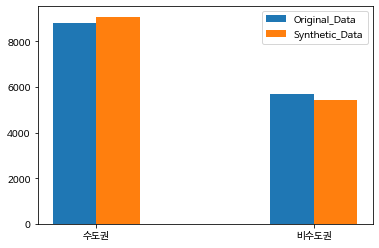

In [ ]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data

region = ["수도권","비수도권"]
original = [len(sample_capital),len(sample_province)]
synthetic_data = [len(new_data_capital),len(new_data_province)]
x_axis = np.arange(len(region))

# Multi bar Chart

plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data')
plt.bar(x_axis +0.20*2, synthetic_data, width=0.2, label = 'Synthetic_Data')

# Xticks

plt.xticks(x_axis+0.3,region)

# Add legend

plt.legend()

# Display

plt.show()

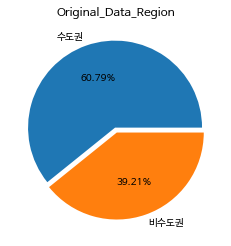

In [ ]:
old = pd.DataFrame(sample['지역'].value_counts()/sample['지역'].count())
old.reset_index(inplace=True)
explode = [0.03] * 2
plt.pie(x = list(old['지역']),
        labels = list(old['index']),
        autopct = '%.2f%%',
        explode = explode) # 소수 둘째짜리까지 표현 
plt.title('Original_Data_Region')         
plt.show()

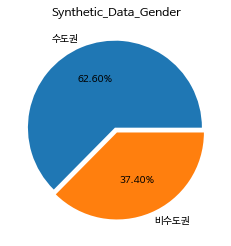

In [ ]:
new = pd.DataFrame(new_data['지역'].value_counts()/new_data['지역'].count())
new.reset_index(inplace=True)
explode = [0.03] * 2
plt.pie(x = list(new['지역']),
        labels = list(new['index']),
        autopct = '%.2f%%',
        explode = explode) # 소수 둘째짜리까지 표현  
plt.title('Synthetic_Data_Gender')   
plt.show()

범주형 막대그래프의 경우에도 유효한 범주형 변수의 막대그래프만 보면 된다고 판단되기 때문에 함수를 짤 필요성을 못느낀다.

# 연속형 자료 상자그림

## 총수입 합계 금액 상자그림

총수입합계 = 필요경비합계금액 + 종합소득금액 

로그화 취하지 않았을 때의 상자그림

([<matplotlib.axis.XTick at 0x7f11acc67fa0>,
 <a list of 2 Text xticklabel objects>)

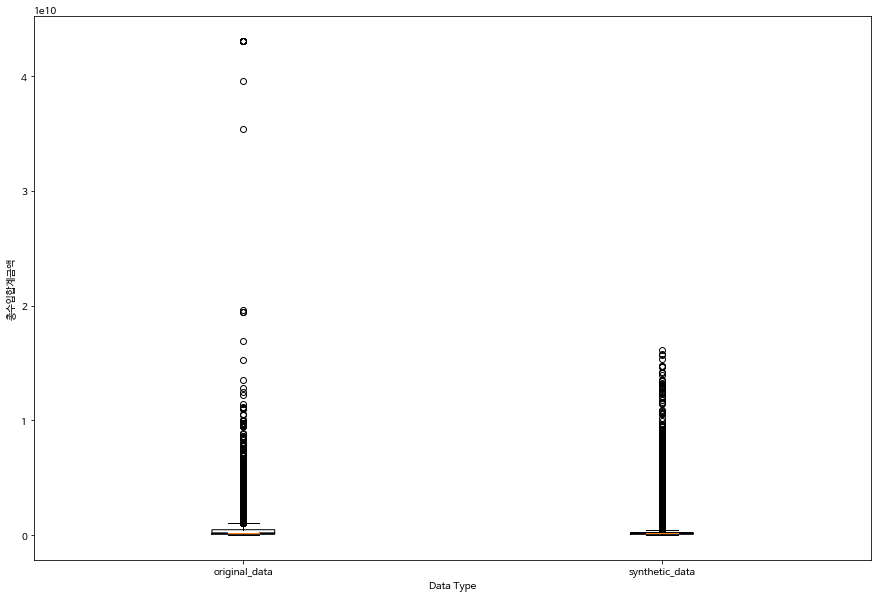

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

ax.boxplot([sample['총수입합계금액'],new_data['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','synthetic_data'])

상자그림으로 판단했을 때 몸통부분은 잘 재현되었지만 이상치는 잘 재현되지 못한것을 확인 할 수 있다.

데이터 분석을 하기 위해 log를 취하는 이유는 한마디로 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함이다.   
또한 우리가 아는 분포의 모습을 볼 수 있다.  

샘플 데이터 로그화

In [ ]:
# 데이터 타입이 수치형인 칼럼만 채택
col1 = [c for c in sample.columns if sample[c].dtype != 'object']
num_df1 = sample[col1]
num_df1

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
45165,45166,40,60950000,40590000,33860000,4500000,15650000,18210000,1650000,1620000,30000
118893,118894,5,1936000000,1467000000,500000000,3440000,10000000,500000000,200000000,5000000,200000000
91682,91683,10,763400000,658000000,105400000,1500000,8640000,96760000,18960000,580000,18380000
136098,136099,6,214600000,45850000,170300000,2330000,11630000,158700000,40900000,900000,40010000
93548,93549,10,337700000,242900000,94740000,7500000,14650000,80090000,14000000,970000,13030000
...,...,...,...,...,...,...,...,...,...,...,...
4330,4331,311,9590000,6450000,3140000,2000000,2000000,1140000,70000,90000,0
38324,38325,57,100600000,75980000,24580000,1500000,4330000,20250000,1960000,90000,1280000
84929,84930,17,862900000,775500000,87390000,7500000,7500000,79890000,13950000,1320000,12630000
43924,43925,41,909800000,879900000,29880000,3500000,7680000,22200000,2250000,820000,1110000


In [ ]:
import numpy as np
log_df1 = np.log(num_df1)
log_df1

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
45165,10.718100,3.688879,17.925564,17.519032,17.337745,15.319588,16.565981,16.717481,14.316286,14.297937,10.308953
118893,11.685988,1.609438,21.383890,21.106485,20.030119,15.050982,16.118096,20.030119,19.113828,15.424948,19.113828
91682,11.426092,2.302585,20.453293,20.304715,18.473273,14.220976,15.971913,18.387744,16.757842,13.270783,16.726774
136098,11.821138,1.791759,19.184286,17.640886,18.953072,14.661379,16.269099,18.882526,17.526641,13.710150,17.504640
93548,11.446241,2.302585,19.637668,19.308160,18.366647,15.830414,16.499951,18.198662,16.454568,13.785051,16.382765
...,...,...,...,...,...,...,...,...,...,...,...
4330,8.373554,5.739793,16.076231,15.679591,14.959733,14.508658,14.508658,13.946539,11.156251,11.407565,-inf
38324,10.553858,4.043051,18.426663,18.145981,17.017444,14.220976,15.281078,16.823665,14.488455,11.407565,14.062371
84929,11.349583,2.833213,20.575809,20.469019,18.285891,15.830414,15.830414,18.196161,16.450990,14.093142,16.351585
43924,10.690239,3.713572,20.628735,20.595319,17.212700,15.068274,15.854130,16.915603,14.626441,13.617060,13.919871


재현 자료 로그화 

In [ ]:
col2 = [c for c in new_data.columns if sample[c].dtype != 'object']
num_df2 = new_data[col2]
num_df2

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
0,81607,5,19128094,27754534,107497719,3505675,9746736,121155919,0,0,0
1,141779,215,175022141,6112923201,132865388,4894685,9952820,61315148,196004386,701213,13874768
2,65991,5,222688801,4706114319,79776087,1495464,27710466,109776392,50767531,2224816,47688720
3,21929,58,1179470173,769085629,15139874,1655031,3244109,0,233739699,1333775,6147258
4,86819,11,227038945,640072908,316380905,4694174,28876376,61844650,0,755735,74277247
...,...,...,...,...,...,...,...,...,...,...,...
14508,97912,5,188745804,2198067233,20876976,1661012,13482151,24539853,0,37101805,4816032
14509,68587,10,163669814,36642792,0,1496139,5235483,18406389,14441611,22581038,1356085
14510,126630,5,34827176,776202709,0,4346947,6369981,23677713,4082302,2921172,3524858
14511,47745,85,638301759,10800892,222202996,3580575,26474349,3409035,0,175779,4377652


In [ ]:
import numpy as np
log_df2 = np.log(num_df2)
log_df2

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
0,11.309670,1.609438,16.766669,17.138910,18.492980,15.069894,16.092443,18.612589,-inf,-inf,-inf
1,11.862025,5.370638,18.980423,22.533671,18.704847,15.403660,16.113366,17.931537,19.093648,13.460567,16.445582
2,11.097274,1.609438,19.221286,22.272128,18.194734,14.217947,17.137321,18.513956,17.742768,14.615185,17.680205
3,9.995565,4.060443,20.888331,20.460713,16.532842,14.319330,14.992351,-inf,19.269719,14.103524,15.631517
4,11.371581,2.397895,19.240632,20.277093,19.572457,15.361833,17.178534,17.940136,-inf,13.535446,18.123315
...,...,...,...,...,...,...,...,...,...,...,...
14508,11.491824,1.609438,19.055912,21.510844,16.854157,14.322938,16.416877,17.015809,-inf,17.429176,15.387461
14509,11.135858,2.302585,18.913362,17.416727,-inf,14.218398,15.470970,16.728208,16.485624,16.932621,14.120112
14510,11.749025,1.609438,17.365909,20.469924,-inf,15.284984,15.667107,16.980045,15.222172,14.887495,15.075351
14511,10.773630,4.442651,20.274322,16.195139,19.219102,15.091034,17.091687,15.041940,-inf,12.076983,15.292023


([<matplotlib.axis.XTick at 0x7f11acb76cd0>,
 <a list of 2 Text xticklabel objects>)

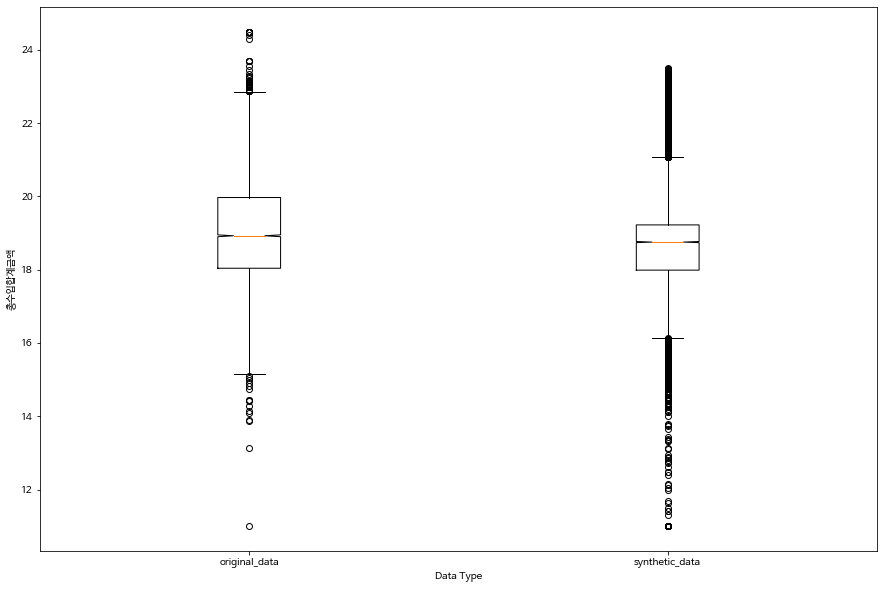

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

ax.boxplot([log_df1['총수입합계금액'],log_df2['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','synthetic_data'])

## 필요경비 합계 금액 상자그림

([<matplotlib.axis.XTick at 0x7f11acae56d0>,
 <a list of 2 Text xticklabel objects>)

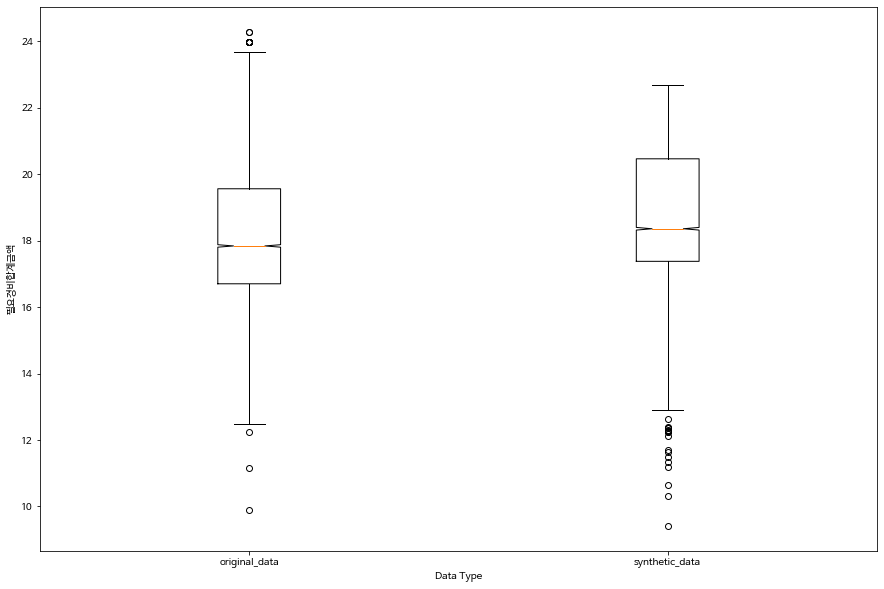

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

ax.boxplot([log_df1['필요경비합계금액'],log_df2['필요경비합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('필요경비합계금액')
plt.xticks([1,2], ['original_data','synthetic_data'])

상자그림으로 판단했을 때 확실히 로그화를 했을때 로그화를 하지 않았을 때 보다 상자그림이 더 관찰하기 쉬운 것으로 판단된다.

# 특이점 처리

#### 위와같은 문제점이 발견됬을때 특이점 처리를 실시 해야한다. 

특이점 처리란 구간을 구분하여 재현자료를 만드는 과정을 의미한다 (EX : 상위 1% / 하위 99% )

여기서 특이점 처리를 잘 해야하는 이유는 국세청 조사의 성격을 생각했을때 높은 값의 관측치일수록 잘 재현되야 하는 이유는 말그대로 세금의 중요성 때문이다.  
 데이터 분석을 실시할 때는 이러한 특징들을 잘 생각하며 데이터를 분석해야한다.

### 각 퍼센트별 상위 / 하위 갯수

 상위 1% / 하위 99%

In [ ]:
print(int(len(sample) * 0.01)) # 재현 , original 자료 갯수
print(int(len(sample) * 0.99))

145
14367


 상위 2% / 하위 98%

In [ ]:
print(int(len(sample) * 0.02)) # 재현 , original 자료 갯수
print(int(len(sample) * 0.98))

290
14222


 상위 3% / 하위 97%

In [ ]:
print(int(len(sample) * 0.03)) # 재현 , original 자료 갯수
print(int(len(sample) * 0.97))

435
14077


 상위 5% / 하위 95%

In [ ]:
print(int(len(new_data) * 0.05)) # 재현 , original 자료 갯수
print(int(len(new_data) * 0.95))

725
13787


### 상/하위로 구간분류의 재현자료 생성과정 

1. 상위와 하위 퍼센트를 따져 그에 맞는 갯수를 판단한다. ( 내림차순 필수 )
2. 그 갯수에 맞는 재현자료를 상위 구간, 하위 구간 따로따로 생성한다.
3. 그 다음 위에서 나온 재현자료를 합친다.

### 상위 1% / 하위 99%

In [10]:
sample_sorted_by_values = sample.sort_values(by='총수입합계금액' ,ascending=False)
sample_head1 = sample_sorted_by_values.head(145)
sample_tail1 = sample_sorted_by_values.tail(14367)

상위 1% 재현자료 만드는 과정 

In [11]:
model = CTGAN(epochs=200,batch_size=10)
model.fit(sample_head1)
one_data = model.sample(145)

상위 99% 재현자료 만드는 과정 

In [12]:
model = CTGAN(epochs=10) # epochs=200 / 원래는 batch_size 100
model.fit(sample_tail1)
nintynine_data = model.sample(14367)

두 자료 합치기 

In [13]:
result1 = pd.concat([one_data, nintynine_data])

로그화

In [15]:
import numpy as np
col3 = [c for c in result1.columns if result1[c].dtype != 'object']
num_df3 = sample[col3]
log_df3 = np.log(num_df3)

### 상위 2% / 하위 98%

In [16]:
sample_sorted_by_values = sample.sort_values(by='총수입합계금액' ,ascending=False)
sample_head2 = sample_sorted_by_values.head(290)
sample_tail2 = sample_sorted_by_values.tail(14222)

상위 2% 재현자료 만드는 과정 

In [17]:
model = CTGAN(epochs=200,batch_size=10)
model.fit(sample_head2)
twoper_data = model.sample(290)

하위 98% 재현자료 만드는 과정 

In [18]:
model = CTGAN(epochs=10) # epochs=200 / 원래는 batch_size 100
model.fit(sample_tail2)
nintyeight_data = model.sample(14222)

두 자료 합치기 

In [19]:
result2 = pd.concat([twoper_data, nintyeight_data])

로그화

In [20]:
col4 = [c for c in result2.columns if result2[c].dtype != 'object']
num_df4 = sample[col4]
log_df4 = np.log(num_df4)

### 상위 3% / 하위 97%

In [21]:
sample_sorted_by_values = sample.sort_values(by='총수입합계금액' ,ascending=False)
sample_head3 = sample_sorted_by_values.head(435)
sample_tail3 = sample_sorted_by_values.tail(14077)

상위 3% 재현자료 만드는 과정 

In [22]:
model = CTGAN(epochs=200,batch_size=10)
model.fit(sample_head3)
threeper_data = model.sample(435)

하위 97% 재현자료 만드는 과정 

In [23]:
model = CTGAN(epochs=10) # epochs=200 / 원래는 batch_size 100
model.fit(sample_tail3)
nintyseven_data = model.sample(14077)

두 자료 합치기 

In [24]:
result3 = pd.concat([threeper_data, nintyseven_data])

로그화

In [25]:
col5 = [c for c in result3.columns if result3[c].dtype != 'object']
num_df5 = sample[col5]
log_df5 = np.log(num_df5)

### 상위 5% / 하위 95%

In [26]:
sample_sorted_by_values = sample.sort_values(by='총수입합계금액' ,ascending=False)
sample_head4 = sample_sorted_by_values.head(725)
sample_tail4 = sample_sorted_by_values.tail(13787)

상위 5% 재현자료 만드는 과정 

In [27]:
model = CTGAN(epochs=200,batch_size=10)
model.fit(sample_head4)
fiveper_data = model.sample(725)

하위 95% 재현자료 만드는 과정

In [28]:
model = CTGAN(epochs=10) # epochs=200 / 원래는 batch_size 100
model.fit(sample_tail4)
nintyfive_data = model.sample(13787)

두 자료 합치기 

In [29]:
result4 = pd.concat([fiveper_data, nintyfive_data])

로그화

In [30]:
col6 = [c for c in result4.columns if result4[c].dtype != 'object']
num_df6 = sample[col6]
log_df6 = np.log(num_df6)

## function 

구간마다 재현자료를 재현하기 위해서 function을 구현해보았다.

1. data : 무슨 데이터를 넣을지    
2. num : 넣을 구간 퍼센트 값 

In [ ]:
def model(data,num):

   arrange_data = data.sort_values(by = '총수입합계금액', ascending = False) # 내림차순 
   top_num =  arrange_data.head(int(len(data) * (num/100)))
   bottom_num = arrange_data.iloc[len(top_num):]

   model = CTGAN(epochs = 200 , batch_size = 10)
   model1 = CTGAN(epochs = 200, batch_size = 100)
   top_result = model.fit(top_num)
   bottom_result = model1.fit(bottom_num)

   top_data = model.sample(len(top_num)) # create synthetic data 
   bottom_data = model1.sample(len(bottom_num)) # create synthetic data 

   return top_data , bottom_data


## 각 상위구간 상자그림 비교 

### 전체 비교 

왼쪽에서부터 첫번째는 원자료, 두번째는 전체 재현자료, 세번째는 구간을 나눈 상위 1% / 하위 99% 자료, 네번째는 상위 2% / 하위 98% 자료, 다섯번째는 상위 3% / 하위 97% 자료, 여섯번째는 상위 5% / 하위 95% 자료

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


([<matplotlib.axis.XTick at 0x7f11af095430>,
 <a list of 6 Text xticklabel objects>)

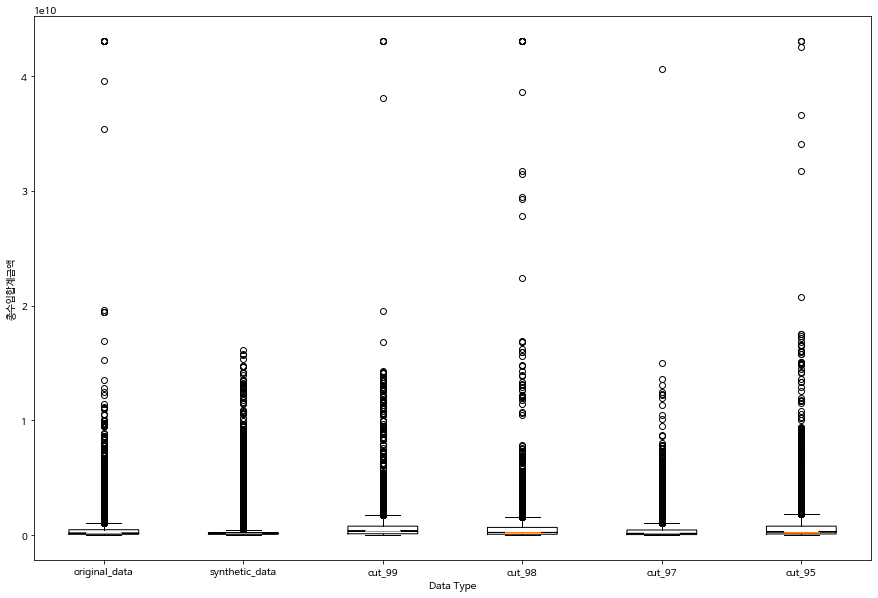

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
ax.boxplot([sample['총수입합계금액'],new_data['총수입합계금액'],result1['총수입합계금액'],result2['총수입합계금액'],result3['총수입합계금액'],result4['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2,3,4,5,6], ['original_data','synthetic_data','cut_99','cut_98','cut_97','cut_95'])

일반데이터로 상자그림을 판단해봤을 때 판단하기 힘들어 로그 상자그림으로 표현하였다.

## 각 상위구간 상자그림 비교 ( 로그화 )

([<matplotlib.axis.XTick at 0x7f11adfd9790>,
 <a list of 6 Text xticklabel objects>)

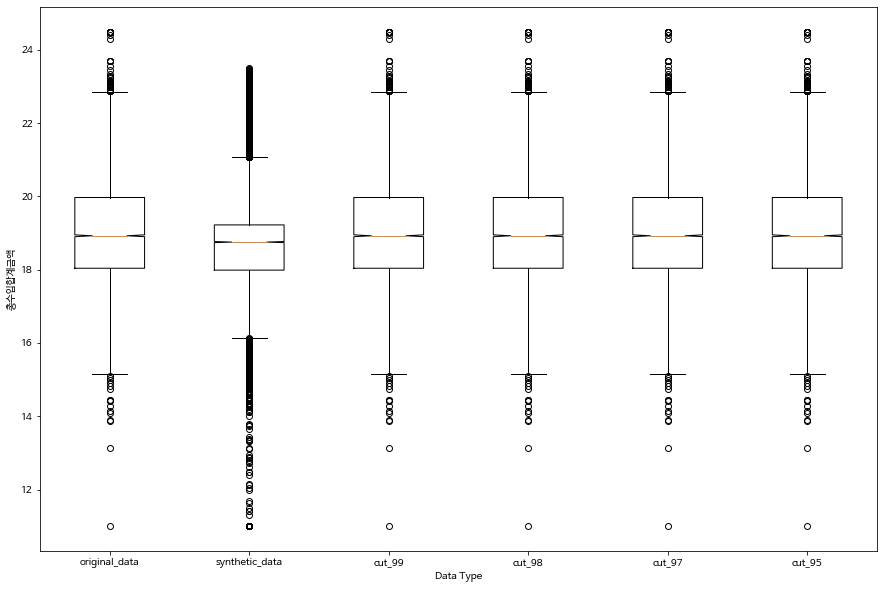

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()

ax.boxplot([log_df1['총수입합계금액'],log_df2['총수입합계금액'],log_df3['총수입합계금액'],log_df4['총수입합계금액'],log_df5['총수입합계금액'],log_df6['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2,3,4,5,6], ['original_data','synthetic_data','cut_99','cut_98','cut_97','cut_95'])

### 각각비교

원자료 vs 전체 재현자료

([<matplotlib.axis.XTick at 0x7f119db4f9a0>,
 <a list of 2 Text xticklabel objects>)

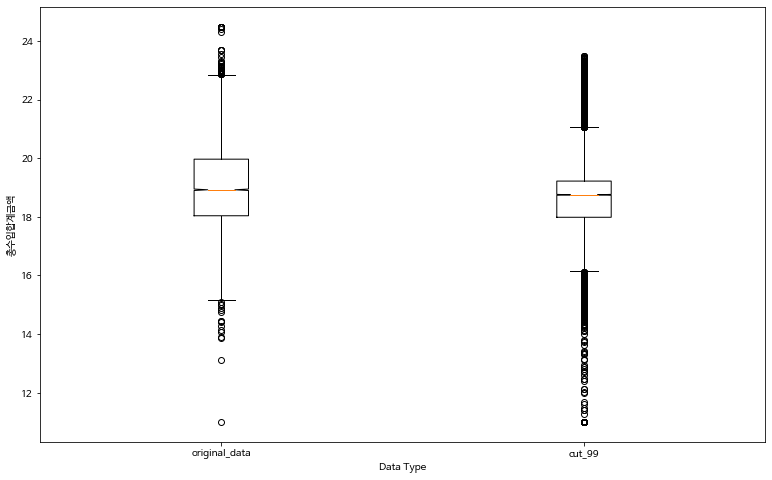

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()
ax.boxplot([log_df1['총수입합계금액'],log_df2['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','synthetic_data'])

원자료 vs ( 상위 1% / 하위 99% 자료 )

([<matplotlib.axis.XTick at 0x7f119dad39d0>,
 <a list of 2 Text xticklabel objects>)

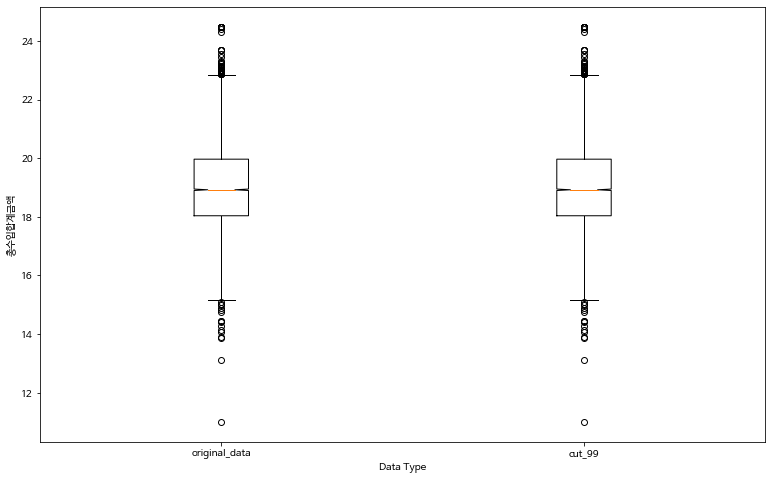

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()
ax.boxplot([log_df1['총수입합계금액'],log_df3['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','cut_99'])

원자료 vs ( 상위 2% / 하위 98% 자료 )

([<matplotlib.axis.XTick at 0x7f119da08340>,
 <a list of 2 Text xticklabel objects>)

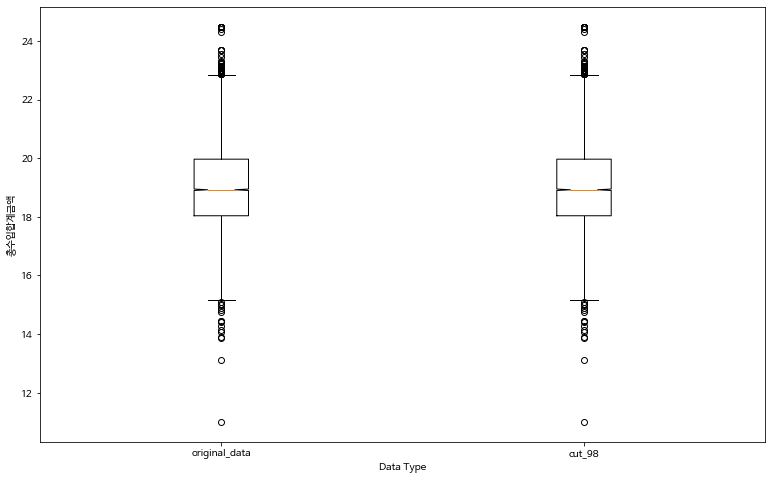

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()
ax.boxplot([log_df1['총수입합계금액'],log_df4['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','cut_98'])

원자료 vs ( 상위 3% / 하위 97% 자료 )

([<matplotlib.axis.XTick at 0x7f119d988610>,
 <a list of 2 Text xticklabel objects>)

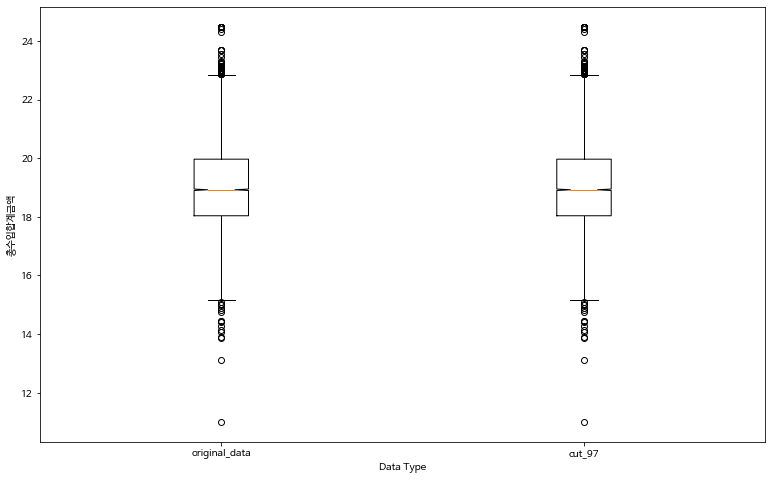

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()
ax.boxplot([log_df1['총수입합계금액'],log_df5['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','cut_97'])

원자료 vs ( 상위 5% / 하위 95% 자료 )

([<matplotlib.axis.XTick at 0x7f119d96da00>,
 <a list of 2 Text xticklabel objects>)

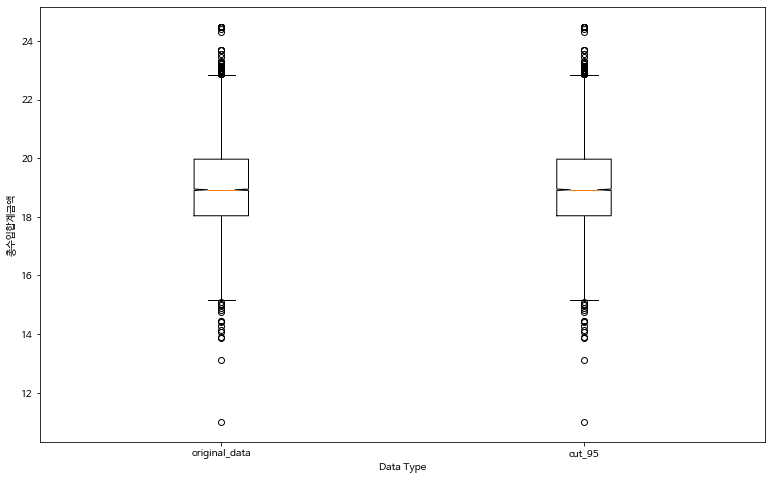

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
fig, ax = plt.subplots()
ax.boxplot([log_df1['총수입합계금액'],log_df6['총수입합계금액']],notch=True)
ax.set_xlabel('Data Type')
ax.set_ylabel('총수입합계금액')
plt.xticks([1,2], ['original_data','cut_95'])

원자료와 비교했을때에 전체재현자료는 이상치를 잘 재현하지 못하지만 구간을 나눴을때는 이상치까지 잘 재현되는 것을 확인 할 수 있었다.

## 원자료, 구간 구분 재현자료 총수입합계금액 기초 통계량

In [ ]:
import pandas as pd
A = sample['총수입합계금액'].describe() 
B = new_data['총수입합계금액'].describe()
C = result1['총수입합계금액'].describe()
D = result2['총수입합계금액'].describe()
E = result3['총수입합계금액'].describe()
F = result4['총수입합계금액'].describe()

pda = DataFrame(A)
pdb = DataFrame(B)
pdc = DataFrame(C)
pdd = DataFrame(D)
pde = DataFrame(E)
pdf = DataFrame(F)

colnames = ["sample","new_data","(1%,99%)","(2%,98%)","(3%,97%)","(5%,95%)"]

alldescribe = pd.concat([pda,pdb,pdc,pdd,pde,pdf],axis=1,keys=['원자료','재현자료','(1%,99%)','(2%,98%)','(3%,97%)','(5%,95%)'])
alldescribe

,원자료,재현자료,"(1%,99%)","(2%,98%)","(3%,97%)","(5%,95%)"
,총수입합계금액,총수입합계금액,총수입합계금액,총수입합계금액,총수입합계금액,총수입합계금액
count,1.451300e+04,1.451300e+04,1.451200e+04,1.451200e+04,1.451200e+04,1.451200e+04
mean,5.196033e+08,4.230196e+08,5.948011e+08,6.641218e+08,4.255470e+08,6.969210e+08
std,1.300680e+09,9.828747e+08,1.312321e+09,1.722109e+09,1.103950e+09,1.818562e+09
min,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
25%,7.044000e+07,5.620153e+07,8.792564e+07,8.045214e+07,7.184435e+07,7.007666e+07
50%,1.694000e+08,1.219220e+08,1.481958e+08,1.661879e+08,1.822644e+08,1.817997e+08
75%,5.011000e+08,2.284516e+08,6.134054e+08,5.864813e+08,3.888938e+08,5.648248e+08
max,4.308000e+10,9.490245e+09,1.261251e+10,4.308000e+10,4.308000e+10,4.308000e+10


기초통계량 표를 보았을때 일단 count는 같아야하고, mean값으로 판단했을때 1% , 99%가 원자료와 유사한 모습을 보여준다, min값의 경우에는 모두 동일한 모습을 보여주며 국세청 자료의 특성상 max값이 중요한데 전체자료를 재현자료로 채택했을 때 max값이 제대로 나오지 않는 것으로 보아 구간을 분리해서 CTGAN모형을 만들어야 되는것으로 판단된다.   
분위수로 따졌을 때에는 2% , 98% 구간이 원자료와 유사한 모습을 보여준다.

# 상관계수 비교

원자료 상관계수

In [ ]:
sample.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,-0.723476,0.235296,0.214858,0.192337,0.236481,0.442767,0.187291,0.149672,0.092598,0.153484
가중치,-0.723476,1.000000,-0.173795,-0.161209,-0.137151,-0.255254,-0.395946,-0.132375,-0.103000,-0.067958,-0.105031
총수입합계금액,0.235296,-0.173795,1.000000,0.946103,0.760911,0.024951,0.235840,0.761726,0.756814,0.615498,0.764171
필요경비합계금액,0.214858,-0.161209,0.946103,1.000000,0.510728,0.020395,0.111343,0.511881,0.506002,0.361583,0.516630
종합소득금액,0.192337,-0.137151,0.760911,0.510728,1.000000,0.023141,0.398855,0.999914,0.998813,0.914949,0.996480
인적공제금액,0.236481,-0.255254,0.024951,0.020395,0.023141,1.000000,0.518896,0.016084,0.008755,0.013258,0.007732
소득공제합계액,0.442767,-0.395946,0.235840,0.111343,0.398855,0.518896,1.000000,0.387672,0.372047,0.328580,0.373526
과세표준금액,0.187291,-0.132375,0.761726,0.511881,0.999914,0.016084,0.387672,1.000000,0.999096,0.915328,0.996737
산출세액,0.149672,-0.103000,0.756814,0.506002,0.998813,0.008755,0.372047,0.999096,1.000000,0.919119,0.997318
세액공제,0.092598,-0.067958,0.615498,0.361583,0.914949,0.013258,0.328580,0.915328,0.919119,1.000000,0.889288


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


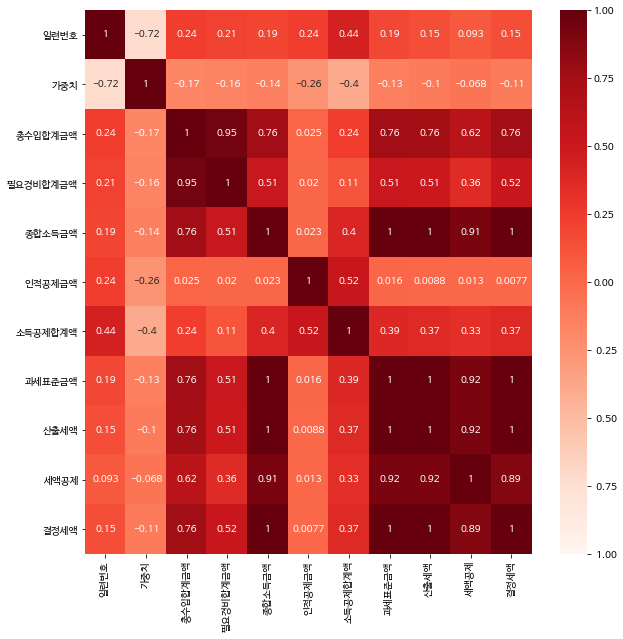

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

전체 재현자료 상관계수

In [ ]:
new_data.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,-0.004142,-0.008192,0.006601,-0.021893,-0.010218,0.006347,0.006219,0.003273,0.002737,-0.007160
가중치,-0.004142,1.000000,-0.004251,-0.000289,-0.003704,0.020424,0.007872,-0.004123,-0.009185,0.007018,-0.001110
총수입합계금액,-0.008192,-0.004251,1.000000,0.008451,0.012848,-0.027351,-0.003945,0.008909,-0.008302,0.017871,-0.007419
필요경비합계금액,0.006601,-0.000289,0.008451,1.000000,-0.000419,-0.012537,-0.011444,0.000124,-0.005669,-0.004664,0.009046
종합소득금액,-0.021893,-0.003704,0.012848,-0.000419,1.000000,-0.008795,0.013274,-0.009918,-0.002944,0.036777,0.007265
인적공제금액,-0.010218,0.020424,-0.027351,-0.012537,-0.008795,1.000000,-0.033754,-0.025550,0.022222,-0.013930,0.005655
소득공제합계액,0.006347,0.007872,-0.003945,-0.011444,0.013274,-0.033754,1.000000,0.005420,-0.024871,0.009041,-0.004817
과세표준금액,0.006219,-0.004123,0.008909,0.000124,-0.009918,-0.025550,0.005420,1.000000,0.003230,-0.001515,0.012584
산출세액,0.003273,-0.009185,-0.008302,-0.005669,-0.002944,0.022222,-0.024871,0.003230,1.000000,-0.018400,0.000825
세액공제,0.002737,0.007018,0.017871,-0.004664,0.036777,-0.013930,0.009041,-0.001515,-0.018400,1.000000,0.004823


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


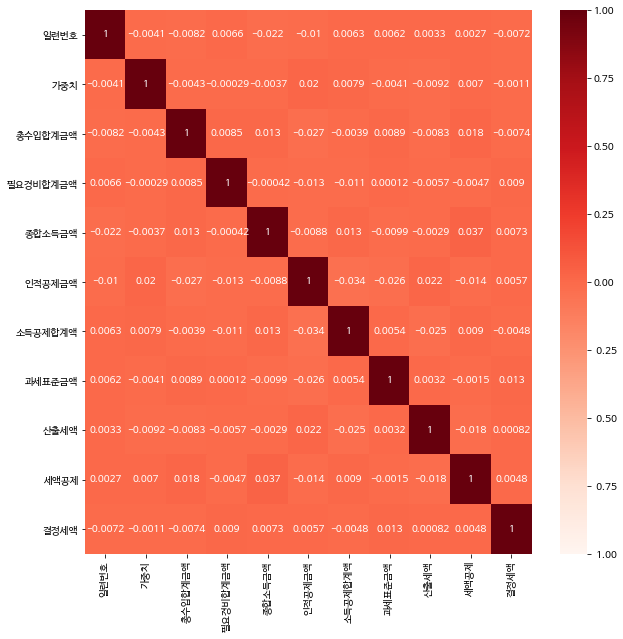

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(new_data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1, '전체재현자료')

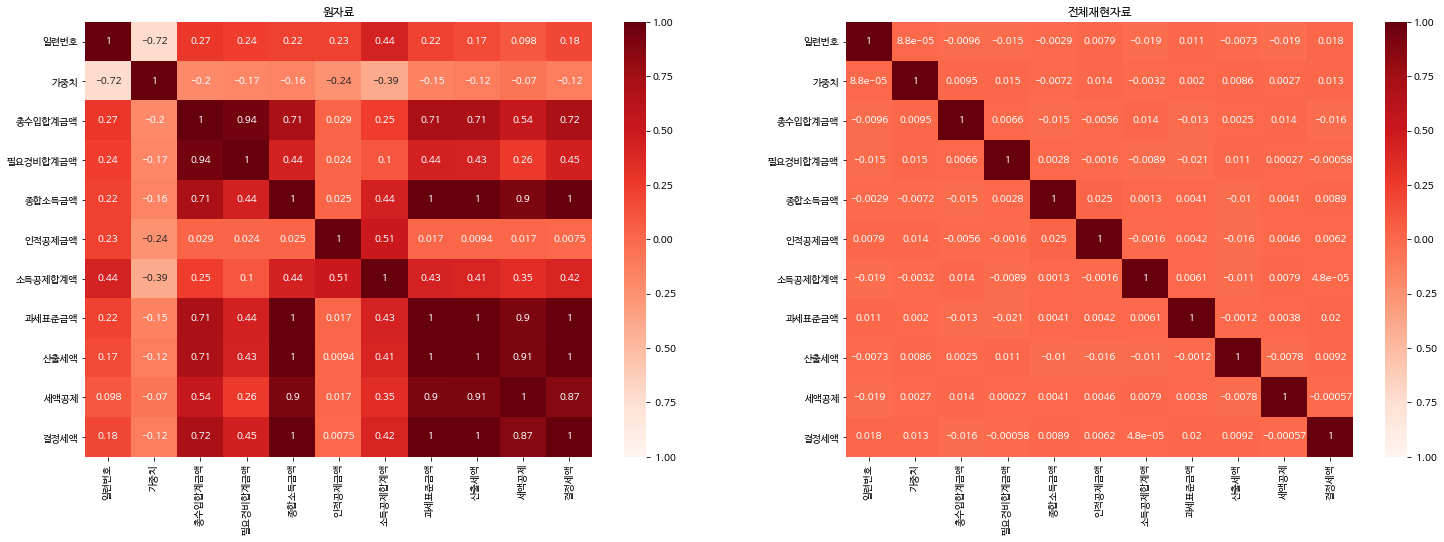

In [31]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(new_data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("전체재현자료")

상위 1% / 하위 99% 상관계수

In [ ]:
result1.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,0.003206,0.051641,0.001526,0.026176,0.002338,0.050197,0.034743,0.065380,0.016536,0.055294
가중치,0.003206,1.000000,-0.038144,-0.004277,-0.010485,0.020886,0.002791,-0.037348,-0.039140,-0.020639,-0.032482
총수입합계금액,0.051641,-0.038144,1.000000,0.152217,0.114300,0.020681,0.261833,0.381766,0.547860,0.134547,0.406668
필요경비합계금액,0.001526,-0.004277,0.152217,1.000000,0.045115,0.002879,0.069429,0.141482,0.182333,0.022219,0.099799
종합소득금액,0.026176,-0.010485,0.114300,0.045115,1.000000,-0.001651,0.085479,0.109527,0.162144,0.154868,0.194020
인적공제금액,0.002338,0.020886,0.020681,0.002879,-0.001651,1.000000,0.005654,0.008471,0.020720,0.005885,0.010352
소득공제합계액,0.050197,0.002791,0.261833,0.069429,0.085479,0.005654,1.000000,0.199028,0.240269,0.114166,0.211405
과세표준금액,0.034743,-0.037348,0.381766,0.141482,0.109527,0.008471,0.199028,1.000000,0.461700,0.081435,0.333653
산출세액,0.065380,-0.039140,0.547860,0.182333,0.162144,0.020720,0.240269,0.461700,1.000000,0.142361,0.430352
세액공제,0.016536,-0.020639,0.134547,0.022219,0.154868,0.005885,0.114166,0.081435,0.142361,1.000000,0.154977


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


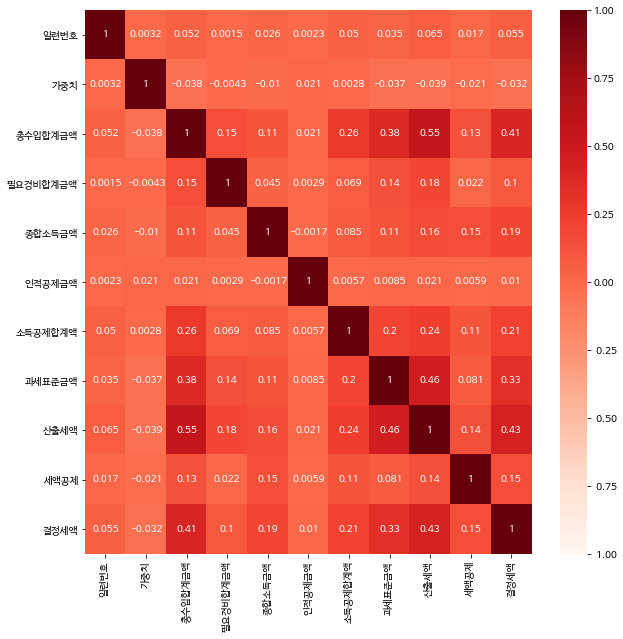

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(result1.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

Text(0.5, 1, '1% / 99%')

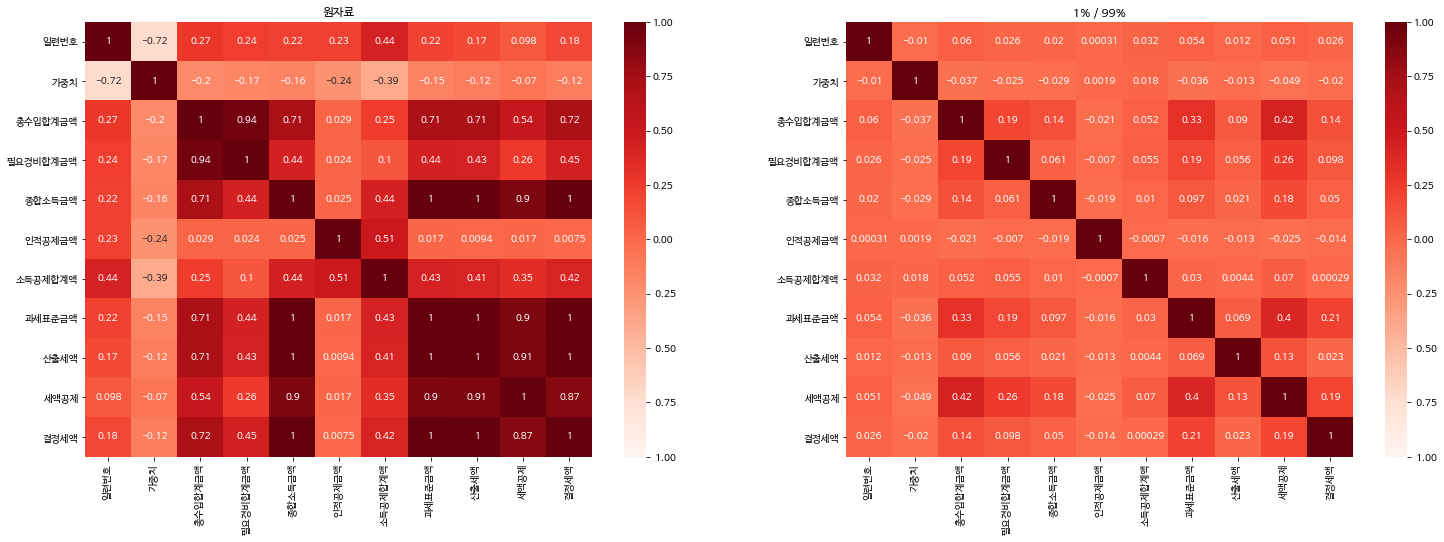

In [33]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(result1.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("1% / 99%")

상위 2% / 하위 98% 상관계수

In [ ]:
result2.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,-0.018339,0.102159,0.134141,0.114596,-0.004124,0.017094,0.055757,0.101447,0.046723,0.071173
가중치,-0.018339,1.000000,-0.064192,-0.062675,-0.060530,-0.003310,-0.007572,-0.038307,-0.058212,-0.033605,-0.048736
총수입합계금액,0.102159,-0.064192,1.000000,0.282974,0.578190,-0.029470,0.140690,0.351618,0.506246,0.316688,0.376494
필요경비합계금액,0.134141,-0.062675,0.282974,1.000000,0.259431,-0.030639,0.010577,0.126712,0.255079,0.103680,0.146014
종합소득금액,0.114596,-0.060530,0.578190,0.259431,1.000000,-0.035145,0.204656,0.435639,0.625383,0.366864,0.509714
인적공제금액,-0.004124,-0.003310,-0.029470,-0.030639,-0.035145,1.000000,-0.010351,-0.019837,-0.034177,-0.014791,-0.026422
소득공제합계액,0.017094,-0.007572,0.140690,0.010577,0.204656,-0.010351,1.000000,0.178734,0.136697,0.199091,0.164923
과세표준금액,0.055757,-0.038307,0.351618,0.126712,0.435639,-0.019837,0.178734,1.000000,0.375926,0.579810,0.376260
산출세액,0.101447,-0.058212,0.506246,0.255079,0.625383,-0.034177,0.136697,0.375926,1.000000,0.270073,0.467284
세액공제,0.046723,-0.033605,0.316688,0.103680,0.366864,-0.014791,0.199091,0.579810,0.270073,1.000000,0.335113


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


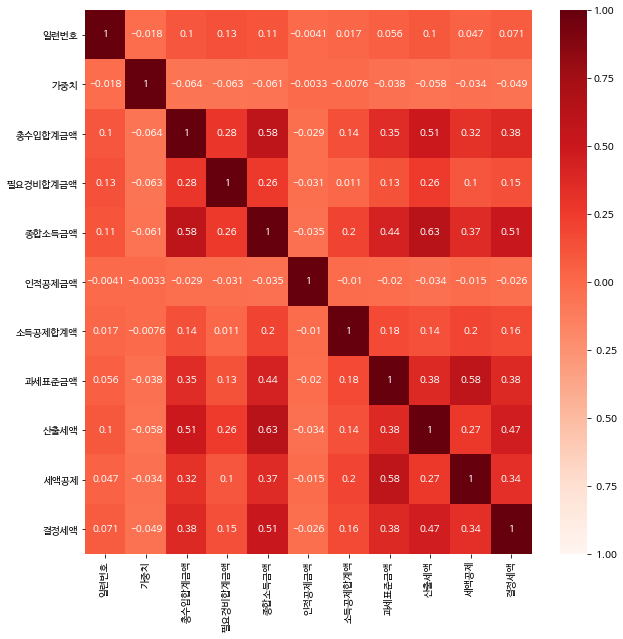

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(result2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1, '2% / 98%')

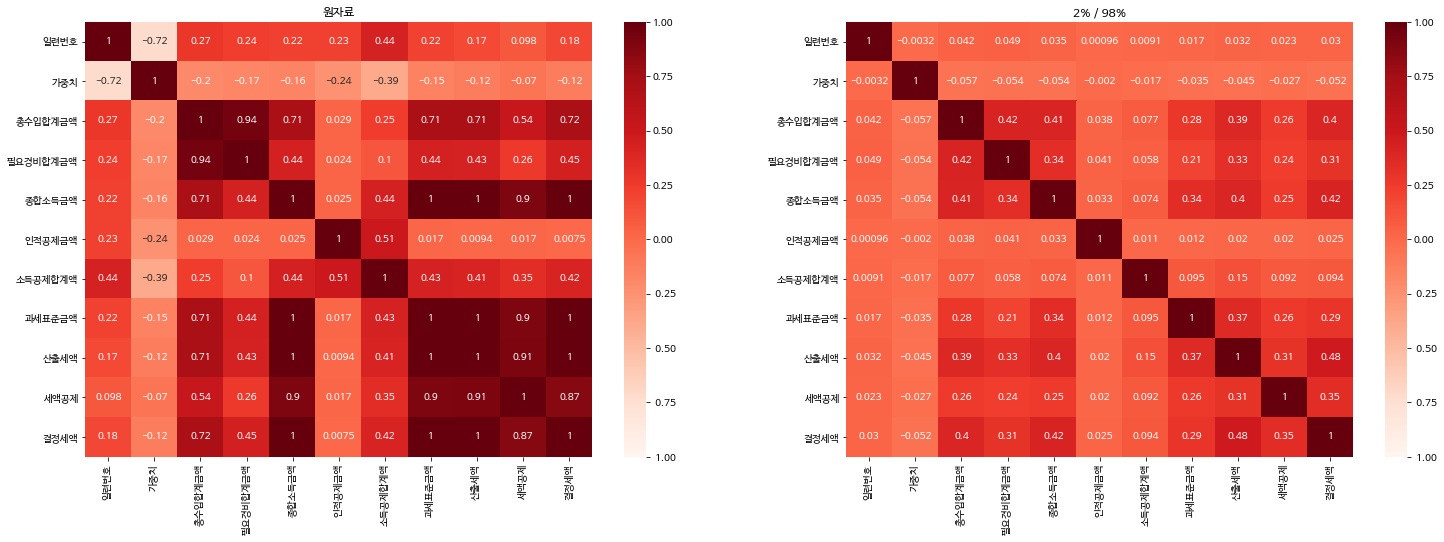

In [34]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(result2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("2% / 98%")

상위 3% / 하위 97% 상관계수

In [ ]:
result3.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,-0.022829,0.130686,0.110760,0.026395,0.017649,0.021992,0.047835,0.055973,0.055338,0.047331
가중치,-0.022829,1.000000,-0.057033,-0.043451,-0.015072,0.003162,0.001631,-0.020155,-0.025898,-0.028071,-0.028227
총수입합계금액,0.130686,-0.057033,1.000000,0.378031,0.181215,0.078133,0.063642,0.177749,0.321953,0.216533,0.226802
필요경비합계금액,0.110760,-0.043451,0.378031,1.000000,0.139443,0.073347,0.023460,0.071036,0.109153,0.150082,0.132046
종합소득금액,0.026395,-0.015072,0.181215,0.139443,1.000000,0.019875,0.022224,0.199773,0.178404,0.132238,0.189158
인적공제금액,0.017649,0.003162,0.078133,0.073347,0.019875,1.000000,-0.001787,0.034557,0.026566,0.034247,0.035154
소득공제합계액,0.021992,0.001631,0.063642,0.023460,0.022224,-0.001787,1.000000,0.028171,0.060099,0.035516,0.086963
과세표준금액,0.047835,-0.020155,0.177749,0.071036,0.199773,0.034557,0.028171,1.000000,0.318944,0.145867,0.159135
산출세액,0.055973,-0.025898,0.321953,0.109153,0.178404,0.026566,0.060099,0.318944,1.000000,0.187126,0.336228
세액공제,0.055338,-0.028071,0.216533,0.150082,0.132238,0.034247,0.035516,0.145867,0.187126,1.000000,0.200837


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


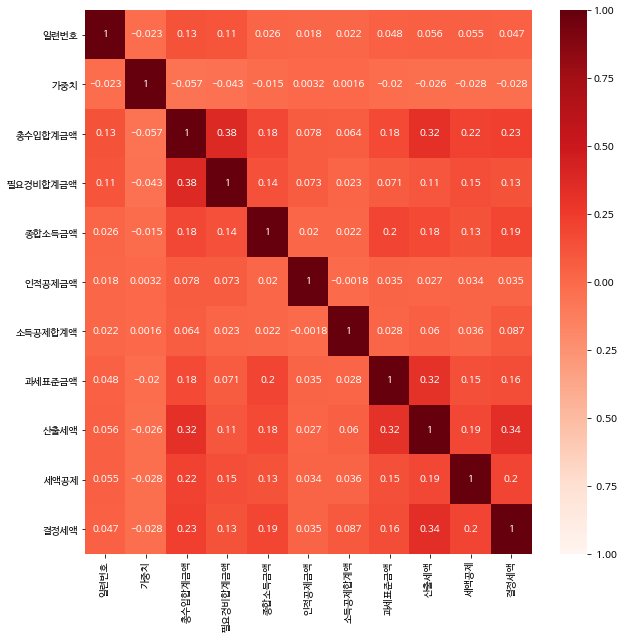

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(result3.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

Text(0.5, 1, '3% / 97%')

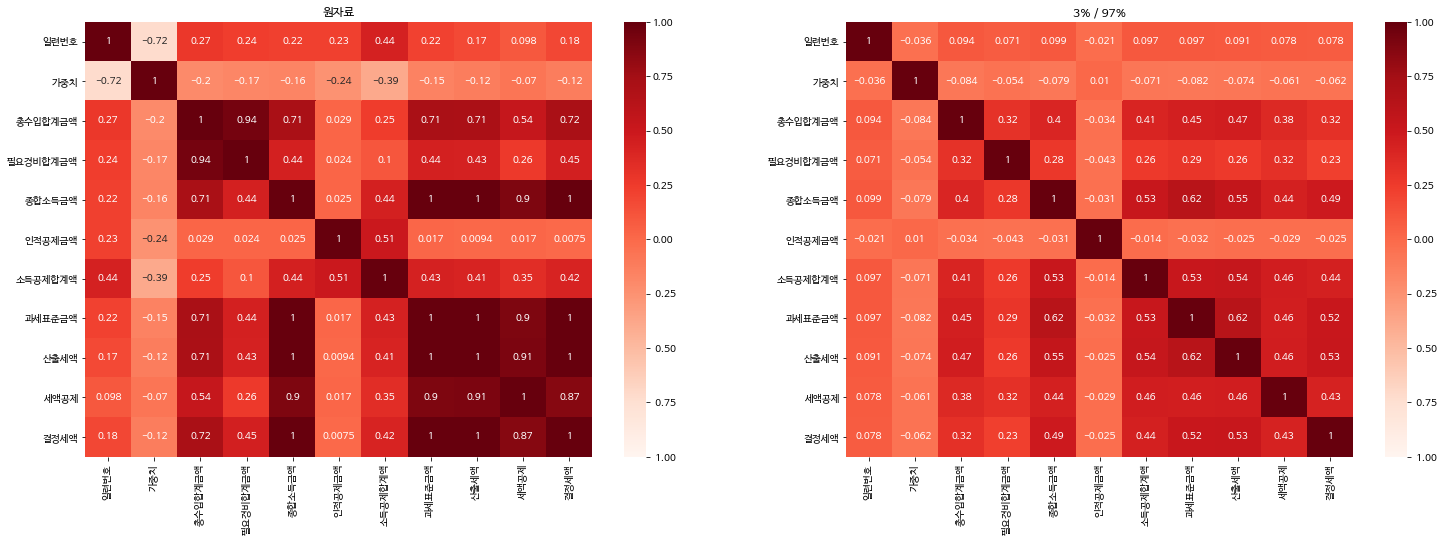

In [35]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(result3.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("3% / 97%")

#### 상위 5% / 하위 95% 상관계수

In [ ]:
result4.corr(method='pearson')

,일련번호,가중치,총수입합계금액,필요경비합계금액,종합소득금액,인적공제금액,소득공제합계액,과세표준금액,산출세액,세액공제,결정세액
일련번호,1.000000,-0.051715,0.143773,0.154205,0.075632,0.013357,0.037694,0.076021,0.099108,0.044689,0.059724
가중치,-0.051715,1.000000,-0.101773,-0.103999,-0.062264,-0.010218,-0.027541,-0.065948,-0.075238,-0.036024,-0.052517
총수입합계금액,0.143773,-0.101773,1.000000,0.423541,0.376972,0.094425,0.151334,0.367797,0.409628,0.276216,0.304589
필요경비합계금액,0.154205,-0.103999,0.423541,1.000000,0.281477,0.089201,0.151052,0.305817,0.340936,0.138901,0.224929
종합소득금액,0.075632,-0.062264,0.376972,0.281477,1.000000,0.079600,0.146880,0.346817,0.286152,0.180305,0.233334
인적공제금액,0.013357,-0.010218,0.094425,0.089201,0.079600,1.000000,0.051310,0.088088,0.074714,0.036375,0.057412
소득공제합계액,0.037694,-0.027541,0.151334,0.151052,0.146880,0.051310,1.000000,0.180313,0.135049,0.127284,0.130260
과세표준금액,0.076021,-0.065948,0.367797,0.305817,0.346817,0.088088,0.180313,1.000000,0.306669,0.210498,0.283783
산출세액,0.099108,-0.075238,0.409628,0.340936,0.286152,0.074714,0.135049,0.306669,1.000000,0.162189,0.298424
세액공제,0.044689,-0.036024,0.276216,0.138901,0.180305,0.036375,0.127284,0.210498,0.162189,1.000000,0.159917


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


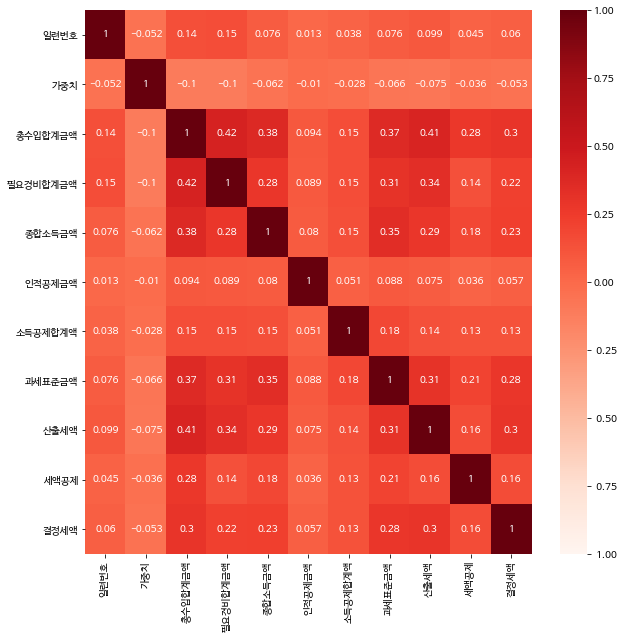

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(result4.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

비교

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


Text(0.5, 1, '5% / 95%')

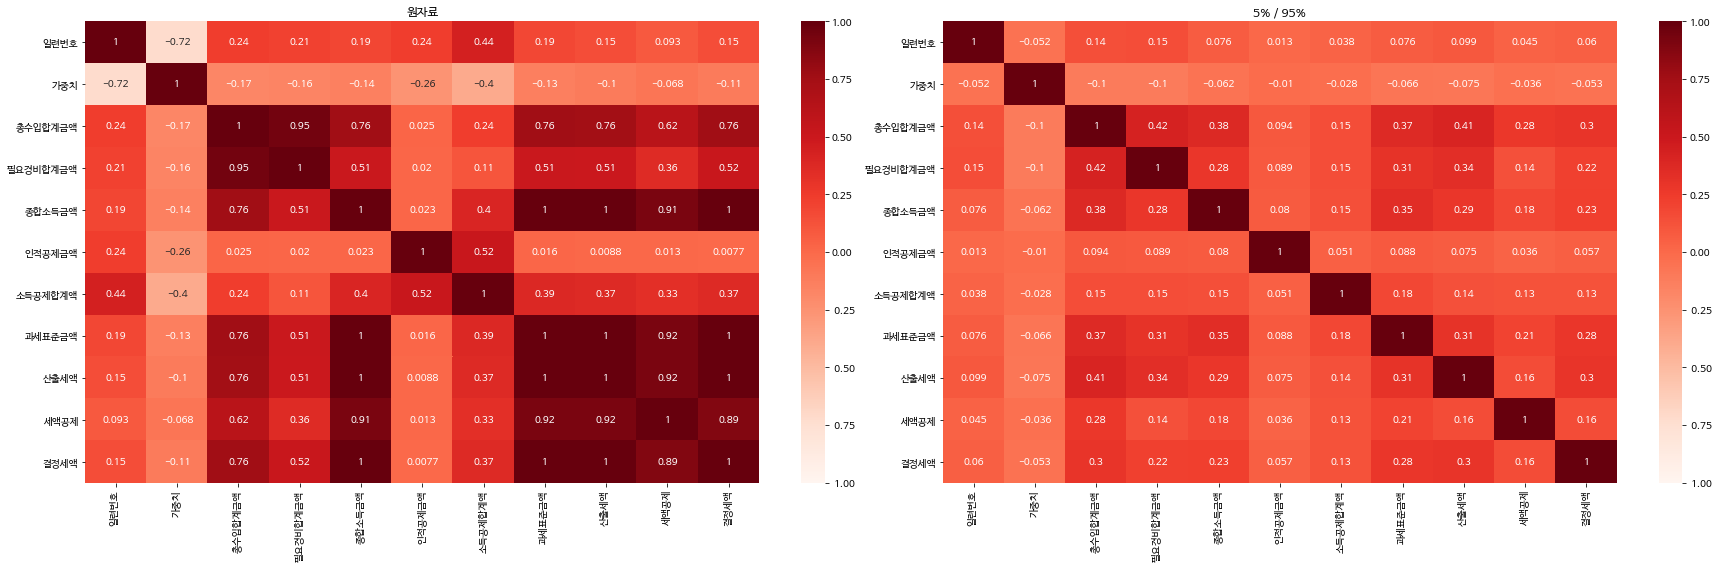

In [ ]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(result4.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("5% / 95%")

번외) 원자료의 상위 5% 와 재현자료 상위 5% 간의 상관계수 비교

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  # The descent needs to be adjusted for the angle.
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  msg = (


Text(0.5, 1, '5% / 95%')

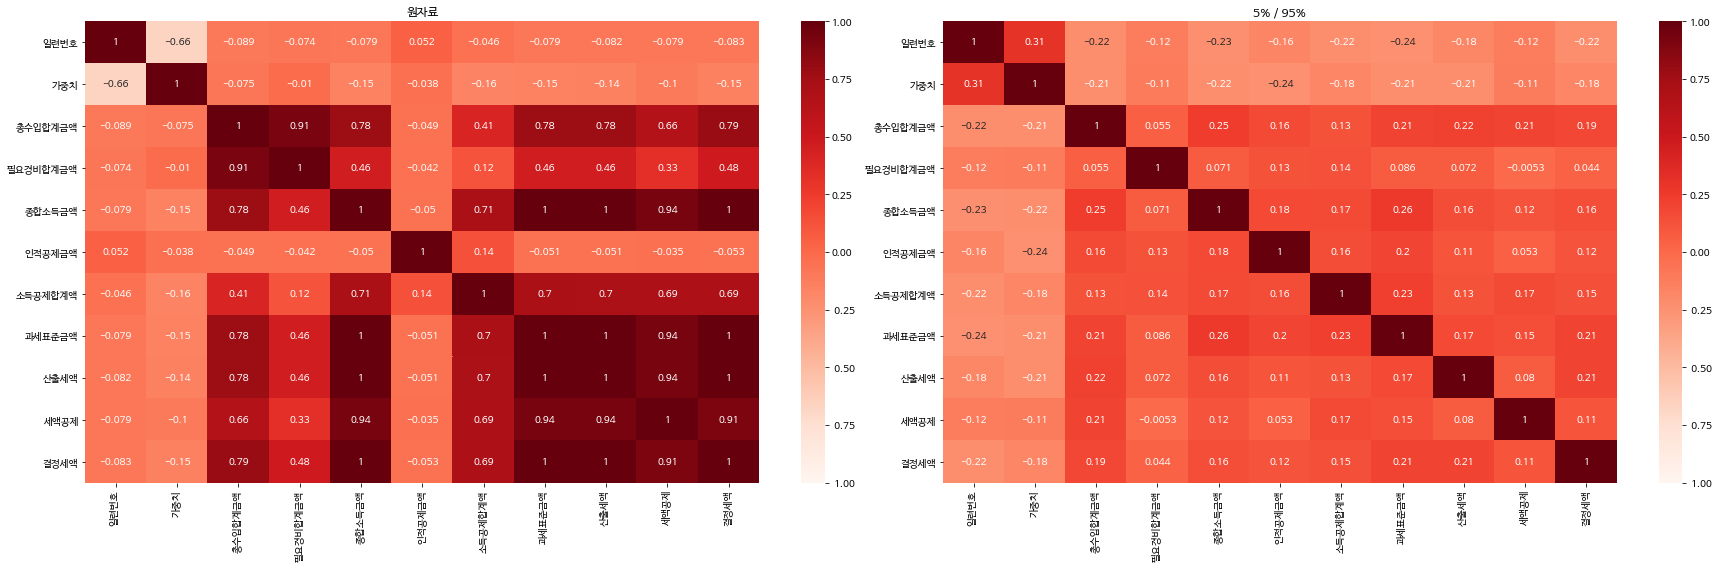

In [ ]:
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(sample_head4.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("원자료")
plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (25,8)
sns.heatmap(fiveper_data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Reds', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.title("5% / 95%")

분명히 총수입합계금액의 경우에는 필요경비합계금액 + 종합소득금액 이어야 한다.  
하지만 재현자료에서는 그렇게 나오지 않으므로 상관계수가 낮게 나오는 것으로 판단된다.  
 CTGAN을 실시하더라도 저런 관계를 유지할 수 있게 만들 수 있는 방법이 뭐가 있는지 알아보고 적용시켜야 할 것으로 보인다.

# 재현자료 평가 결과 ( 번외 )

In [ ]:
from scipy import stats

전체 재현자료 

In [ ]:
stats.kstest(sample['총수입합계금액'],new_data['총수입합계금액']) 
CS1 = 1 - stats.kstest(sample['총수입합계금액'],new_data['총수입합계금액']).statistic # 1 - statistic 결과값 도출 

상위 1% / 하위 99%

In [ ]:
stats.kstest(sample['총수입합계금액'],result1['총수입합계금액']) 
CS2 = 1 - stats.kstest(sample['총수입합계금액'],result1['총수입합계금액']).statistic # 1 - statistic 결과값 도출 

상위 2% / 하위 98%

In [ ]:
stats.kstest(sample['총수입합계금액'],result2['총수입합계금액']) 
CS3 = 1 - stats.kstest(sample['총수입합계금액'],result2['총수입합계금액']).statistic # 1 - statistic 결과값 도출 

상위 3% / 하위 97%

In [ ]:
stats.kstest(sample['총수입합계금액'],result3['총수입합계금액']) 
CS4 = 1 - stats.kstest(sample['총수입합계금액'],result3['총수입합계금액']).statistic # 1 - statistic 결과값 도출 

상위 5% / 하위 95%

In [ ]:
stats.kstest(sample['총수입합계금액'],result4['총수입합계금액']) 
CS5 = 1 - stats.kstest(sample['총수입합계금액'],result4['총수입합계금액']).statistic # 1 - statistic 결과값 도출 

In [ ]:
print(CS1),print(CS2),print(CS3),print(CS4),print(CS5)
Synthetic_Data = ['전체재현자료','1%/99%','2%/99%','3%/99%','5%/99%']
VALUE = [CS1,CS2,CS3,CS4,CS5]
pd.DataFrame({'Synthetic_Data' : ['전체 재현 자료','(1% / 99%)','(2% / 98%)','(3% / 97%)','(5% / 95%)'],
              'VALUE' : [CS1,CS2,CS3,CS4,CS5]})

0.8169916626472817
0.8033777276898307
0.8973069643070263
0.8759617655645537
0.8493443955238853


,Synthetic_Data,VALUE
0,전체 재현 자료,0.816992
1,(1% / 99%),0.803378
2,(2% / 98%),0.897307
3,(3% / 97%),0.875962
4,(5% / 95%),0.849344


KSTEST - 데이터 누적 분포함수와 비교하고자 하는 분포의 누적 분포 함수 가느이 최대 거리를 통계량으로 사용하는 가설 검정 방법이다.

결과 확인했을 때 상위 1% 구간과 하위 99% 구간을 구분한 재현자료가 원자료와 가장 가깝게 재현한것으로 확인된다.
-> 이것도 결과가 다르게 나오는 것을 확인할 수 있다. 